In [27]:
import pandas as pd 
import requests 
import matplotlib.pyplot as plt
import geopandas as gpd
routes_columns = ['airline', 'airline_id', 'source_airport', 'source_airport_id', 'destination_airport', 'destination_airport_id', 'codeshare', 'stops', 'equipment']
airlines_columns = ['airline_id', 'name', 'alias','iata', 'icao', 'callsign', 'country', 'active']
airports_columns = ['airport_id', 'city', 'country', 'iata', 'icao', 'lat', 'lon', 'altitude', 'timezone', 'dst', 'tz_database_timezone', 'type', 'source']
routes = pd.read_csv('routes.csv', header= None, names= routes_columns)
airlines = pd.read_csv('airlines.csv', header= None, names = airlines_columns)
airports = pd.read_csv('airports.csv', header= None, names = airports_columns)

routes

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [28]:
airlines

,airline_id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
...,...,...,...,...,...,...,...,...
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y


In [29]:
airports

,airport_id,city,country,iata,icao,lat,lon,altitude,timezone,dst,tz_database_timezone,type,source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


Enter the IATA code of the departure airport: LAX


C:\Users\koali\AppData\Local\Temp\ipykernel_16240\3221557696.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


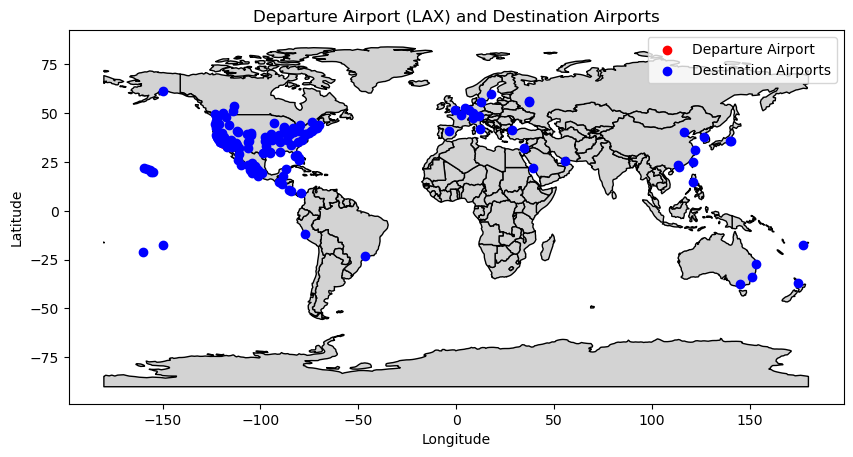

In [34]:
# Function to plot departure and destination airports on a world map using GeoPandas
def plot_routes_on_world_map(departure_airport):
    # Filter routes based on departure airport
    filtered_routes = routes[routes['source_airport'] == departure_airport]
    
    if filtered_routes.empty:
        print("No routes available from the selected departure airport.")
    else:
        # Convert airports DataFrame to GeoDataFrame
        gdf_airports = gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports['lon'], airports['lat']))
        
        # Filter destination airports
        dest_airports = gdf_airports[gdf_airports['iata'].isin(filtered_routes['destination_airport'])]

        # Plot departure airport and destination airports
        fig, ax = plt.subplots(figsize=(10, 6))
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world.plot(ax=ax, color='lightgrey', edgecolor='black')
        gdf_airports[gdf_airports['iata'] == departure_airport].plot(ax=ax, color='red', marker='o', label='Departure Airport')
        dest_airports.plot(ax=ax, color='blue', marker='o', label='Destination Airports')
        
        plt.title('Departure Airport ({}) and Destination Airports'.format(departure_airport))
        plt.legend()
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

# Prompt user for input
departure_airport = input("Enter the IATA code of the departure airport: ").upper()

# Plot departure and destination airports on a world map using GeoPandas
plot_routes_on_world_map(departure_airport)

In [36]:
# Convert DataFrames to JSON and save to files
routes.to_json('routes.json', orient='records')
airlines.to_json('airlines.json', orient='records')
airports.to_json('airports.json', orient='records')

print("JSON data saved to files: routes.json, airlines.json, airports.json")

JSON data saved to files: routes.json, airlines.json, airports.json
